# Clustering Yelp Restaurants

**Part 2: To be completed INDIVIDUALLY and due on March 24 at 3pm.**

In [ ]:
print("John Spinelli, U50128653")

In this assignment, we will continue to work with the [Yelp dataset](http://cs-people.bu.edu/bahargam/506/yelp_dataset_challenge_academic_dataset.tar) that we used in Homework 2-1.

We will continue to try to find culinary districts in Las Vegas. 

(As a reminder from last time, these are characterized by closeness and similarity of restaurants. Use the "longitude" and "latitude" to cluster closeness.)

However, in this analysis we will not use the Yelp-supplied "categories" to cluster for similarity as we did in Part 1.

Instead we will cluster the reviews themselves, extracting categories in an unsupervised fashion.  

Specifically, you are to use PCA/SVD on the Yelp reviews to cluster restaurants based off on their reviews.  As a reminder, LSA consists of using PCA applied to the document-term matrix.



**(20 pts)**

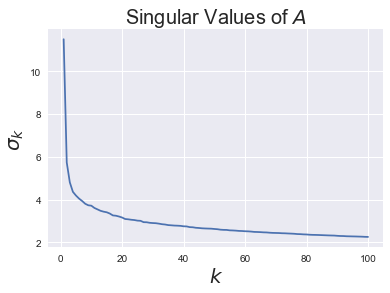

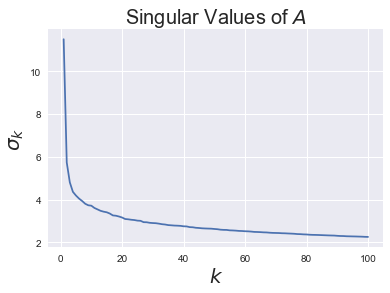

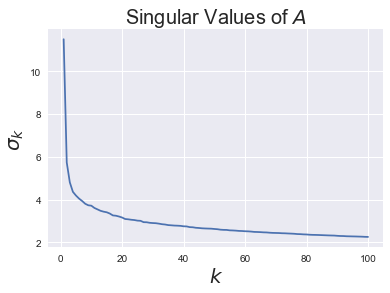

In [10]:
# -*- coding: utf-8 -*-

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame as Df
import sklearn.datasets as sk_data
import sklearn.metrics as metrics
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import mixture
from sklearn.cluster import AgglomerativeClustering as AC
import json
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer as cv
from sklearn import preprocessing
import matplotlib as mpl
import matplotlib.cm as cm
from sklearn.feature_extraction.text import TfidfVectorizer
import random 
from sklearn.decomposition import TruncatedSVD as TSVD

path = "/Users/JohnSpinelli/desktop/yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_business.json"
path2 = "/Users/JohnSpinelli/desktop/yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_review.json"

def sc_evaluate_clusters_kmeans(X,max_clusters):
    s = np.zeros(max_clusters+1)
    s[0] = 0;
    s[1] = 0;
    for k in range(2,max_clusters+1):
        kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
        temp = kmeans.fit_predict(X)
        s[k] = metrics.silhouette_score(X,kmeans.labels_,metric='euclidean')
    return s

def sc_evaluate_clusters_hierarchical(X,max_clusters):
    s = np.zeros(max_clusters+1)
    s[0] = 0;
    s[1] = 0;
    for k in range(2,max_clusters+1):
        hier = AC(n_clusters=k)
        temp = hier.fit_predict(X)
        s[k] = metrics.silhouette_score(X,hier.labels_,metric='euclidean')
    return s

def sc_evaluate_clusters_GMM(X,max_clusters):
    s = np.zeros(max_clusters+1)
    s[0] = 0;
    s[1] = 0;
    for k in range(2,max_clusters+1):
        GMM = mixture.GMM(n_components=k,covariance_type='spherical')
        temp = GMM.fit_predict(X)
        s[k] = metrics.silhouette_score(X,temp)
    return s

def graphData(data,maxClusters,title):    
    
    plt.plot(range(2,maxClusters+1),data[2:])
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouete Coefficient')
    plt.title(title)
    plt.show()

def translate(value, leftMin, leftMax, rightMin, rightMax):
    # Figure out how 'wide' each range is
    leftSpan = leftMax - leftMin
    rightSpan = rightMax - rightMin

    # Convert the left range into a 0-1 range (float)
    valueScaled = float(value - leftMin) / float(leftSpan)

    # Convert the 0-1 range into a value in the right range.
    return rightMin + (valueScaled * rightSpan)



restaurantData = []
categories = []
with open(path,encoding = "ISO-8859-1") as jsonData:
    for line in jsonData:
        data_contents = json.loads(line)
        
        if "Restaurants" in data_contents["categories"] and data_contents["city"] == "Las Vegas":
            restaurantData.append({"business_id":data_contents["business_id"],\
            "latitude":data_contents["latitude"],\
            "longitude":data_contents["longitude"]})
            for item in data_contents["categories"]:
                categories.append(item.lower())
           
           
            
categories.remove("restaurants")
restaurantDf = Df(restaurantData)

reviews = []

with open(path2,encoding = "ISO-8859-1") as jsonData:
    for line in jsonData:
        line = json.loads(line)
        reviews.append({'business_id':line['business_id'],'text':line['text']})
        
            

reviewDf = Df(reviews)

mergedData = pd.merge(left=restaurantDf,right=reviewDf,on='business_id',how='inner') 
finalData = mergedData.drop_duplicates("business_id")
finalData.index = [x for x in range(0,4658)]

### Begin running SVD ###
reviewList = list(finalData["text"].values)
vectorizer = TfidfVectorizer(decode_error = 'ignore', ngram_range=(1,1), stop_words='english')
reviewExtract = vectorizer.fit_transform(reviewList)
features = vectorizer.get_feature_names()

u,s,vt = sp.sparse.linalg.svds(reviewExtract,100)
invS = sorted(s,reverse=True)



fig = plt.figure(figsize=(6,4))
plt.plot(range(1,1+len(invS)),invS)
plt.xlabel(r'$k$',size=20)
plt.ylabel(r'$\sigma_k$',size=20)
_ = plt.title(r'Singular Values of $A$',size=20)
plt.show()


From the above graph displaying singular values, I can conlclude that 10 will be an optimal choice for principle components. 

/Users/JohnSpinelli/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/JohnSpinelli/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/JohnSpinelli/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/JohnSpinelli/anaconda3/lib/python3.6/site-packag

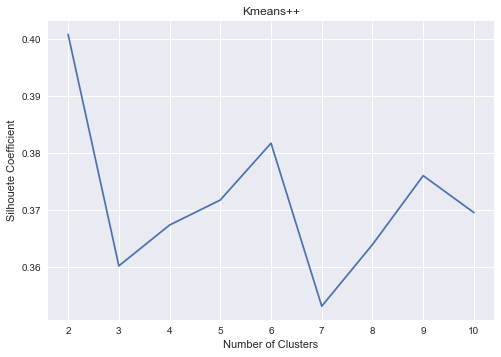

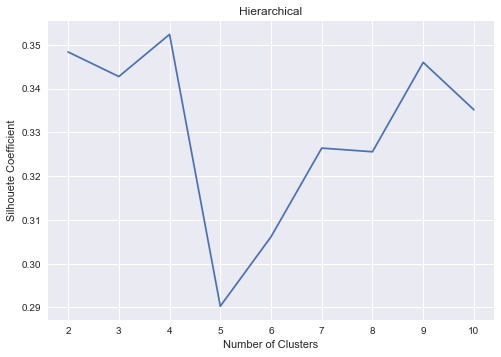

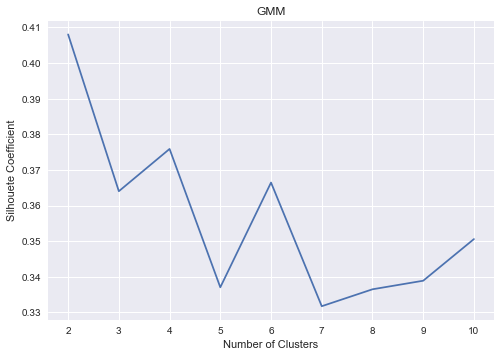

In [5]:
# -*- coding: utf-8 -*-

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame as Df
import sklearn.datasets as sk_data
import sklearn.metrics as metrics
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import mixture
from sklearn.cluster import AgglomerativeClustering as AC
import json
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer as cv
from sklearn import preprocessing
import matplotlib as mpl
import matplotlib.cm as cm
from sklearn.feature_extraction.text import TfidfVectorizer
import random 
from sklearn.decomposition import TruncatedSVD as TSVD

path = "/Users/JohnSpinelli/desktop/yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_business.json"
path2 = "/Users/JohnSpinelli/desktop/yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_review.json"

def sc_evaluate_clusters_kmeans(X,max_clusters):
    s = np.zeros(max_clusters+1)
    s[0] = 0;
    s[1] = 0;
    for k in range(2,max_clusters+1):
        kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
        temp = kmeans.fit_predict(X)
        s[k] = metrics.silhouette_score(X,kmeans.labels_,metric='euclidean')
    return s

def sc_evaluate_clusters_hierarchical(X,max_clusters):
    s = np.zeros(max_clusters+1)
    s[0] = 0;
    s[1] = 0;
    for k in range(2,max_clusters+1):
        hier = AC(n_clusters=k)
        temp = hier.fit_predict(X)
        s[k] = metrics.silhouette_score(X,hier.labels_,metric='euclidean')
    return s

def sc_evaluate_clusters_GMM(X,max_clusters):
    s = np.zeros(max_clusters+1)
    s[0] = 0;
    s[1] = 0;
    for k in range(2,max_clusters+1):
        GMM = mixture.GMM(n_components=k,covariance_type='spherical')
        temp = GMM.fit_predict(X)
        s[k] = metrics.silhouette_score(X,temp)
    return s

def graphData(data,maxClusters,title):    
    
    plt.plot(range(2,maxClusters+1),data[2:])
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouete Coefficient')
    plt.title(title)
    plt.show()

def translate(value, leftMin, leftMax, rightMin, rightMax):
    # Figure out how 'wide' each range is
    leftSpan = leftMax - leftMin
    rightSpan = rightMax - rightMin

    # Convert the left range into a 0-1 range (float)
    valueScaled = float(value - leftMin) / float(leftSpan)

    # Convert the 0-1 range into a value in the right range.
    return rightMin + (valueScaled * rightSpan)



restaurantData = []
categories = []
with open(path,encoding = "ISO-8859-1") as jsonData:
    for line in jsonData:
        data_contents = json.loads(line)
        
        if "Restaurants" in data_contents["categories"] and data_contents["city"] == "Las Vegas":
            restaurantData.append({"business_id":data_contents["business_id"],\
            "latitude":data_contents["latitude"],\
            "longitude":data_contents["longitude"]})
            for item in data_contents["categories"]:
                categories.append(item.lower())
           
           
            
categories.remove("restaurants")
restaurantDf = Df(restaurantData)

reviews = []

with open(path2,encoding = "ISO-8859-1") as jsonData:
    for line in jsonData:
        line = json.loads(line)
        reviews.append({'business_id':line['business_id'],'text':line['text']})
        
            

reviewDf = Df(reviews)

mergedData = pd.merge(left=restaurantDf,right=reviewDf,on='business_id',how='inner') 
finalData = mergedData.drop_duplicates("business_id")
finalData.index = [x for x in range(0,4658)]

### Begin running SVD ###
reviewList = list(finalData["text"].values)
vectorizer = TfidfVectorizer(decode_error = 'ignore', ngram_range=(1,1), stop_words='english')
reviewExtract = vectorizer.fit_transform(reviewList)
features = vectorizer.get_feature_names()

u,s,vt = sp.sparse.linalg.svds(reviewExtract,100)
invS = sorted(s,reverse=True)


"""
fig = plt.figure(figsize=(6,4))
plt.plot(range(1,1+len(invS)),invS)
plt.xlabel(r'$k$',size=20)
plt.ylabel(r'$\sigma_k$',size=20)
_ = plt.title(r'Singular Values of $A$',size=20)
"""


re_dense = reviewExtract.todense()
centered_re = re_dense - np.mean(re_dense, axis=0)

truncatedRe = TSVD(10)
truncated_review = truncatedRe.fit_transform(reviewExtract)
tReviewScaled = preprocessing.scale(truncated_review)

latitudes = list(finalData["latitude"].values)
longitudes = list(finalData["longitude"].values)
latScaled = preprocessing.scale(latitudes)
longScaled = preprocessing.scale(longitudes)
latLongVec = [(latitudes[x],longitudes[x]) for x in range(len(longitudes))]
latLongScaled = preprocessing.scale(latLongVec)

### Using same values from homework 2-1 to stay consistent for the last part
scaleAcross = [(translate(np.mean(x[0]),-2.69,3.39,-0.44,4.90),translate(np.mean(x[1]),-2.69,3.39,-0.44,4.90)) for x in latLongScaled]

clusterData = np.concatenate((scaleAcross,truncated_review),axis=1)
maxC = 10

kmeansData = sc_evaluate_clusters_kmeans(clusterData,maxC)
kTitle = "Kmeans++"

hierarchicalData = sc_evaluate_clusters_hierarchical(clusterData,maxC)
ACtitle = "Hierarchical"

GMMData = sc_evaluate_clusters_GMM(clusterData,maxC)
GMMtitle = "GMM"


graphData(kmeansData,maxC,kTitle)
graphData(hierarchicalData,maxC,ACtitle)
graphData(GMMData,maxC,GMMtitle)




Find clusters using the 3 different techniques we discussed in class: k-means++, hierarchical, and GMM. Visualize the clusters by plotting the longitude/latitude of the restaurants in a scatter plot and label each cluster. 

Note that to label each cluster, you will need to think about how to extract labels from the PCA/SVD results.
**(25 pts)**

/Users/JohnSpinelli/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/JohnSpinelli/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/JohnSpinelli/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/JohnSpinelli/anaconda3/lib/python3.6/site-packag

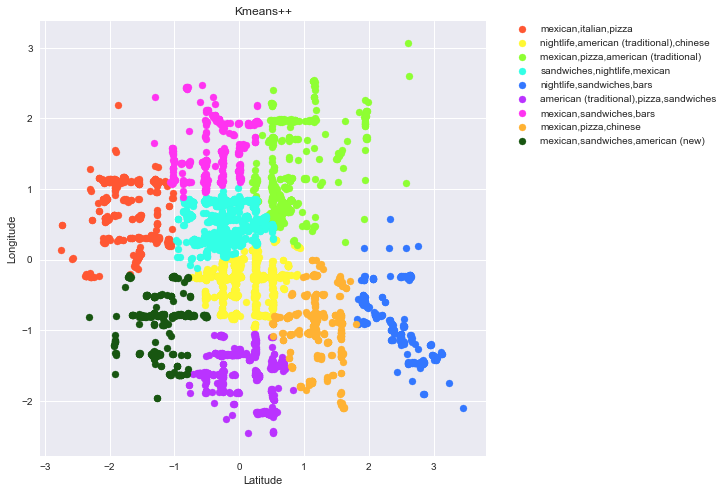

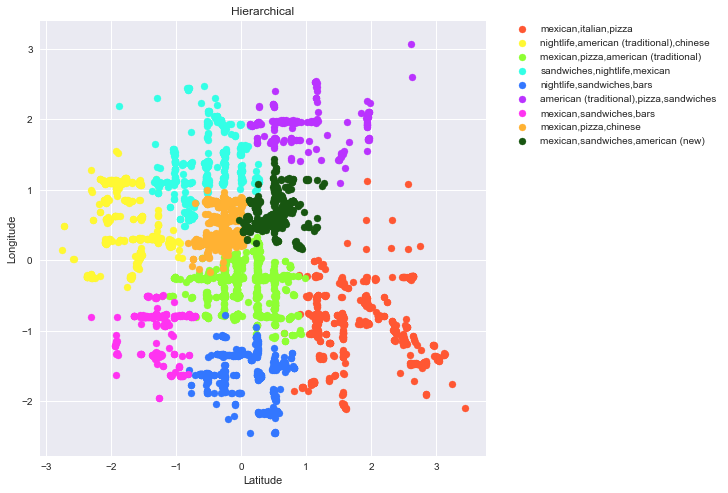

/Users/JohnSpinelli/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:52: DeprecationWarning: Class GMM is deprecated; The class GMM is deprecated in 0.18 and will be  removed in 0.20. Use class GaussianMixture instead.
  warnings.warn(msg, category=DeprecationWarning)
/Users/JohnSpinelli/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function distribute_covar_matrix_to_match_covariance_type is deprecated; The functon distribute_covar_matrix_to_match_covariance_typeis deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/JohnSpinelli/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function log_multivariate_normal_density is deprecated; The function log_multivariate_normal_density is deprecated in 0.18 and will be removed in 0.20.
  warnings.warn(msg, category=DeprecationWarning)
/Users/JohnSpinelli/anaconda3/lib/python3.6/site-packag

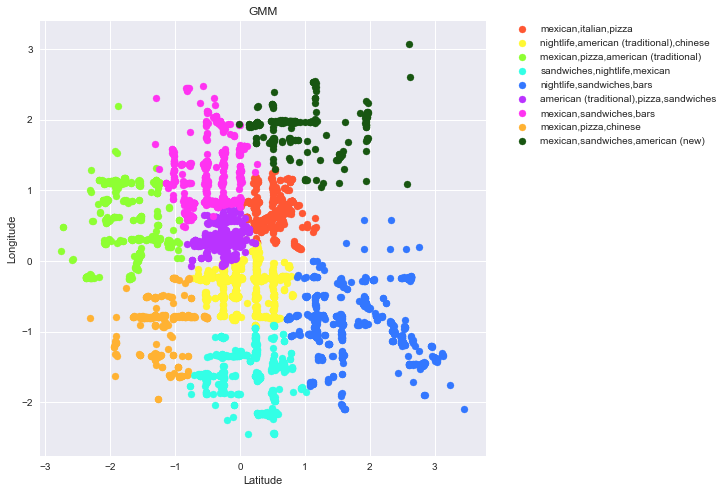

In [1]:
# -*- coding: utf-8 -*-

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame as Df
import sklearn.datasets as sk_data
import sklearn.metrics as metrics
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import mixture
from sklearn.cluster import AgglomerativeClustering as AC
import json
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer as cv
from sklearn import preprocessing
import matplotlib as mpl
import matplotlib.cm as cm
from sklearn.feature_extraction.text import TfidfVectorizer
import random 
from sklearn.decomposition import TruncatedSVD as TSVD

path = "/Users/JohnSpinelli/desktop/yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_business.json"
path2 = "/Users/JohnSpinelli/desktop/yelp_dataset_challenge_academic_dataset/yelp_academic_dataset_review.json"

def sc_evaluate_clusters_kmeans(X,max_clusters):
    s = np.zeros(max_clusters+1)
    s[0] = 0;
    s[1] = 0;
    for k in range(2,max_clusters+1):
        kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
        temp = kmeans.fit_predict(X)
        s[k] = metrics.silhouette_score(X,kmeans.labels_,metric='euclidean')
    return s

def sc_evaluate_clusters_hierarchical(X,max_clusters):
    s = np.zeros(max_clusters+1)
    s[0] = 0;
    s[1] = 0;
    for k in range(2,max_clusters+1):
        hier = AC(n_clusters=k)
        temp = hier.fit_predict(X)
        s[k] = metrics.silhouette_score(X,hier.labels_,metric='euclidean')
    return s

def sc_evaluate_clusters_GMM(X,max_clusters):
    s = np.zeros(max_clusters+1)
    s[0] = 0;
    s[1] = 0;
    for k in range(2,max_clusters+1):
        GMM = mixture.GMM(n_components=k,covariance_type='spherical')
        temp = GMM.fit_predict(X)
        s[k] = metrics.silhouette_score(X,temp)
    return s

def graphData(data,maxClusters,title):    
    
    plt.plot(range(2,maxClusters+1),data[2:])
    plt.xlabel('Number of Clusters')
    plt.ylabel('Silhouete Coefficient')
    plt.title(title)
    plt.show()

def translate(value, leftMin, leftMax, rightMin, rightMax):
    # Figure out how 'wide' each range is
    leftSpan = leftMax - leftMin
    rightSpan = rightMax - rightMin

    # Convert the left range into a 0-1 range (float)
    valueScaled = float(value - leftMin) / float(leftSpan)

    # Convert the 0-1 range into a value in the right range.
    return rightMin + (valueScaled * rightSpan)



restaurantData = []
categories = []
with open(path,encoding = "ISO-8859-1") as jsonData:
    for line in jsonData:
        data_contents = json.loads(line)
        
        if "Restaurants" in data_contents["categories"] and data_contents["city"] == "Las Vegas":
            restaurantData.append({"business_id":data_contents["business_id"],\
            "latitude":data_contents["latitude"],\
            "longitude":data_contents["longitude"]})
            for item in data_contents["categories"]:
                categories.append(item.lower())
           
           
            
categories.remove("restaurants")
restaurantDf = Df(restaurantData)

reviews = []

with open(path2,encoding = "ISO-8859-1") as jsonData:
    for line in jsonData:
        line = json.loads(line)
        reviews.append({'business_id':line['business_id'],'text':line['text']})
        
            

reviewDf = Df(reviews)

mergedData = pd.merge(left=restaurantDf,right=reviewDf,on='business_id',how='inner') 
finalData = mergedData.drop_duplicates("business_id")
finalData.index = [x for x in range(0,4658)]

### Begin running SVD ###
reviewList = list(finalData["text"].values)
vectorizer = TfidfVectorizer(decode_error = 'ignore', ngram_range=(1,1), stop_words='english')
reviewExtract = vectorizer.fit_transform(reviewList)
features = vectorizer.get_feature_names()

u,s,vt = sp.sparse.linalg.svds(reviewExtract,100)
invS = sorted(s,reverse=True)


"""

fig = plt.figure(figsize=(6,4))
plt.plot(range(1,1+len(invS)),invS)
plt.xlabel(r'$k$',size=20)
plt.ylabel(r'$\sigma_k$',size=20)
_ = plt.title(r'Singular Values of $A$',size=20)

err = np.cumsum(np.array(invS)[::-1]**2)
err = np.sqrt(err[::-1])


fig = plt.figure(figsize=(6,4))
plt.plot(range(1,101),err[0:100]/np.linalg.norm(reviewExtract.toarray()))
plt.xlabel(r'$k$',size=16)
plt.ylabel(r'relative F-norm error',size=16)
_ = plt.title(r'Relative Error of rank-$k$ approximation to $A$',size=16)

"""
re_dense = reviewExtract.todense()
centered_re = re_dense - np.mean(re_dense, axis=0)

truncatedRe = TSVD(10)
truncated_review = truncatedRe.fit_transform(reviewExtract)
tReviewScaled = preprocessing.scale(truncated_review)

latitudes = list(finalData["latitude"].values)
longitudes = list(finalData["longitude"].values)
latScaled = preprocessing.scale(latitudes)
longScaled = preprocessing.scale(longitudes)
latLongVec = [(latitudes[x],longitudes[x]) for x in range(len(longitudes))]
latLongScaled = preprocessing.scale(latLongVec)

### Using same values from homework 2-1 to stay consistent for the last part
scaleAcross = [(translate(np.mean(x[0]),-2.69,3.39,-0.44,4.90),translate(np.mean(x[1]),-2.69,3.39,-0.44,4.90)) for x in latLongScaled]

clusterData = np.concatenate((scaleAcross,truncated_review),axis=1)
maxC = 10

kmeansData = sc_evaluate_clusters_kmeans(clusterData,maxC)
kTitle = "Kmeans++"

hierarchicalData = sc_evaluate_clusters_hierarchical(clusterData,maxC)
ACtitle = "Hierarchical"

GMMData = sc_evaluate_clusters_GMM(clusterData,maxC)
GMMtitle = "GMM"

"""
graphData(kmeansData,maxC,kTitle)
graphData(hierarchicalData,maxC,ACtitle)
graphData(GMMData,maxC,GMMtitle)
"""

### From these plots, it seems that 9 is a good value to use for clusters

### Plotting Data for Kmeans++

### Plot Data for Kmeans++ ###

maxClusters = 9

kmeans = KMeans(n_clusters=maxClusters, init='k-means++', max_iter=500)
tempK = kmeans.fit_predict(clusterData)


categories1 = [x for x in range(len(kmeans.labels_)) if kmeans.labels_[x] == 0]
categories2 = [x for x in range(len(kmeans.labels_)) if kmeans.labels_[x] == 1]
categories3 = [x for x in range(len(kmeans.labels_)) if kmeans.labels_[x] == 2]
categories4 = [x for x in range(len(kmeans.labels_)) if kmeans.labels_[x] == 3]
categories5 = [x for x in range(len(kmeans.labels_)) if kmeans.labels_[x] == 4]
categories6 = [x for x in range(len(kmeans.labels_)) if kmeans.labels_[x] == 5]
categories7 = [x for x in range(len(kmeans.labels_)) if kmeans.labels_[x] == 6]
categories8 = [x for x in range(len(kmeans.labels_)) if kmeans.labels_[x] == 7]
categories9 = [x for x in range(len(kmeans.labels_)) if kmeans.labels_[x] == 8]

business1 = Counter([categories[x] for x in categories1]).most_common(6)
business2 = Counter([categories[x] for x in categories2]).most_common(6)
business3 = Counter([categories[x] for x in categories3]).most_common(6)
business4 = Counter([categories[x] for x in categories4]).most_common(6)
business5 = Counter([categories[x] for x in categories5]).most_common(6)
business6 = Counter([categories[x] for x in categories6]).most_common(6)
business7 = Counter([categories[x] for x in categories7]).most_common(6)
business8 = Counter([categories[x] for x in categories8]).most_common(6)
business9 = Counter([categories[x] for x in categories9]).most_common(6)

finalLabels = [business1,business2,business3,business4,business5,business6,\
               business7,business8,business9]



colors = ['#FF5733','#FFF833','#8EFF33','#33FFE6','#3377FF','#BA33FF','#FF33F1','#FFB233','#185611','#6780B8',\
          '#AB8FC9','#AB5B67','#5BABA2','#795535','#797935']

plt.figure(figsize=(8,8))

for i in range(maxClusters):
    plt.scatter(latScaled[tempK==i],longScaled[tempK==i],color=colors[i],\
                label=finalLabels[i][3][0]+','+finalLabels[i][4][0]+','+finalLabels[i][5][0])

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Kmeans++")
plt.show()



### Plot Data for Hierarchical ###

hier = AC(n_clusters=maxClusters)
tempH = hier.fit_predict(clusterData)

### Taken From Python Data Science for Dummies Source Code ###


plt.figure(figsize=(8,8))

for i in range(maxClusters):
    kmeansForH = KMeans(n_clusters=maxClusters, init='k-means++', max_iter=500)
    kmeansForH.fit_predict(clusterData[tempH==i])
    plt.scatter(latScaled[tempH==i],longScaled[tempH==i],color=colors[i],\
                label=finalLabels[i][3][0]+','+finalLabels[i][4][0]+','+finalLabels[i][5][0])
    

plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("Hierarchical")
plt.show()


### Plot Data for GMM ###


gmm=mixture.GMM(n_components=maxClusters,covariance_type='spherical')
tempG=gmm.fit_predict(clusterData)

plt.figure(figsize=(8,8))
for i in range(maxClusters):
    kmeansForG = KMeans(n_clusters=maxClusters, init='k-means++', max_iter=500)
    kmeansForG.fit_predict(clusterData[tempG==i])
    plt.scatter(latScaled[tempG==i],longScaled[tempG==i],color=colors[i],\
                label=finalLabels[i][3][0]+','+finalLabels[i][4][0]+','+finalLabels[i][5][0])
    
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.title("GMM")
plt.show()









        



Compare your clusters with the results you obtained in Part 1. Use cluster comparison metrics, and also comment on which clustering appears (from your inspection of the clusters) to be more informative, and why. **(15 pts)**

Compared to my results from homework 2-1, my clusterings appear much more distinct and properly spaced, despite the fact that the labeling may be incorrect. I utilized the same methods as homework 2-1 in terms of scaling, plotting and parsing data, yet the reviews dataset has made my clustering scheme much more distinguishable. In relation to my last homework, all of the clustering done appears to be more informative as it is much more defined and visible. 

In terms of Silhouette Score, this homework had significantly less Silhouette Scores. 

After calculating the inertia's in the console, I determined the following inertias for the clusters:
Kmeans++: 1078.22408905
Hierarchical:  240.606250989
Gmm: 242.436878909

Which indicates extremely different results from my homework 1-1, in which Kmeans++ performed the best, followed by GMM, followed by Hierarchical. 

----------